In [10]:
import pyscreenshot as ImageGrab
import time
images_folder="C:\\Users\\sdey7\\Python Programs\\capture_image\\9\\"
for i in range(0,100):
   time.sleep(12)
   im=ImageGrab.grab(bbox=(200,415,870,790)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

saved...... 0
clear screen now and redraw now........
saved...... 1
clear screen now and redraw now........
saved...... 2
clear screen now and redraw now........
saved...... 3
clear screen now and redraw now........
saved...... 4
clear screen now and redraw now........
saved...... 5
clear screen now and redraw now........
saved...... 6
clear screen now and redraw now........
saved...... 7
clear screen now and redraw now........
saved...... 8
clear screen now and redraw now........
saved...... 9
clear screen now and redraw now........
saved...... 10
clear screen now and redraw now........
saved...... 11
clear screen now and redraw now........
saved...... 12
clear screen now and redraw now........
saved...... 13
clear screen now and redraw now........
saved...... 14
clear screen now and redraw now........
saved...... 15
clear screen now and redraw now........
saved...... 16
clear screen now and redraw now........
saved...... 17
clear screen now and redraw now........
saved...... 18
clear

In [3]:
#Generate dataset
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("C:\\Users\\sdey7\\Python Programs\\capture_image\\"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [4]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
207      2       0       0       0       0       0       0       0       0   
0        0       0       0       0       0       0       0       0       0   
357      3       0       0       0       0       0       0       0       0   
835      8       0       0       0       0       0       0       0       0   
970      9       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
259      2       0       0       0       0       0       0       0       0   
521      5       0       0       0       0       0       0       0       0   
746      7       0       0       0       0       0       0       0       0   
724      7       0       0       0       0       0       0       0       0   
252      2       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [5]:
X = data.drop(["label"],axis=1)
Y= data["label"]

3


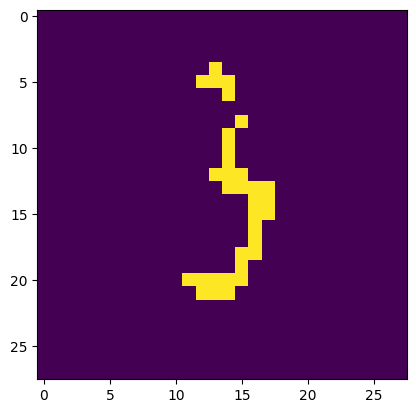

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 314
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [7]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2)

In [8]:
import joblib
from sklearn.svm import SVC
classifier=SVC(kernel="linear", random_state=6)
classifier.fit(train_x,train_y)
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [9]:
from sklearn import metrics
prediction=classifier.predict(test_x)
print("Accuracy= ",metrics.accuracy_score(prediction, test_y))

Accuracy=  0.89


In [12]:
#prediction of image drawn in paint
  
import joblib
import cv2
import numpy as np #pip install numpy
import time
import pyscreenshot as ImageGrab
  
model=joblib.load("model/digit_recognizer")
images_folder="img/"
  
while True:
   img=ImageGrab.grab(bbox=(200,415,870,790))
    
   img.save(images_folder+"img.png")
   im = cv2.imread(images_folder+"img.png")
   im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
   im_gray  =cv2.GaussianBlur(im_gray, (15,15), 0)
    
   #Threshold the image
   ret, im_th = cv2.threshold(im_gray,100, 255, cv2.THRESH_BINARY)
   roi = cv2.resize(im_th, (28,28), interpolation  =cv2.INTER_AREA)
    
   rows,cols=roi.shape
    
   X = []
    
   ##  Fill the data array with pixels one by one.
   for i in range(rows):
       for j in range(cols):
           k = roi[i,j]
           if k>100:
               k=1
           else:
               k=0
           X.append(k)
            
   predictions  =model.predict([X])
   print("Prediction:",predictions[0])
   cv2.putText(im, "Prediction is: "+str(predictions[0]), (20,20), 0, 0.8,(0,255,0),2,cv2.LINE_AA)
    
   cv2.startWindowThread()
   cv2.namedWindow("Result")
   cv2.imshow("Result",im)
   cv2.waitKey(10000)
   if cv2.waitKey(1)==13: #27 is the ascii value of esc, 13 is the ascii value of enter
       break
cv2.destroyAllWindows()

C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 2


C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 4


C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 5


C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 7


C:\Users\sdey7\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Prediction: 0


KeyboardInterrupt: 